In [46]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,ZeroPadding2D, GlobalMaxPooling2D
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib
import matplotlib.pyplot as plt

In [49]:
def deep_cnn(input_shape,weight_decay,num_classes):
        
    model = Sequential()        
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(48, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(48, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())    
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(80, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(80, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(80, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(80, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(80, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling2D())

    model.add(Dense(500))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    #model.summary () # 输出网络结构信息
    return model

    
#标准化
def standardization(x_train,x_test):      
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train, axis=(0, 1, 2, 3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
    return x_train, x_test

#归一化
def normalize(x_train,x_test):
    x_train_max=np.max(x_train),x_train_min=np.min(x_train)
    x_test_max=np.max(x_test),x_test_min=np.min(x_test)
    x_train=(x_train-x_train_min)/(x_train_max-x_train_min)
    x_test=(x_test-x_test_min)/(x_test_max-x_test_min)
    return x_train, x_test

    
#训练参数
batch_size = 128
maxepoches = 100
learning_rate = 0.01
lr_decay = 1e-6
lr_drop = 20
num_classes = 10
weight_decay = 0.0005
x_shape = [32,32,3]

#加载数据
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 数据处理
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#调用归一化
x_train, x_test = normalize(x_train, x_test)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#动态学习率
def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))


#模型搭建
model=deep_cnn(x_shape,weight_decay,num_classes)

#优化器设置
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

#回调函数设置
checkpoint = keras.callbacks.ModelCheckpoint(filepath='./my_deep_cnn.h5', monitor='val_accuracy', verbose=1,save_best_only=True)
earlystop=keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='auto')
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

In [ ]:
# 模型训练过程
hist = model.fit_generator(x_train, y_train,
                           batch_size=batch_size,
                           steps_per_epoch=x_train.shape[0] // batch_size,
                           epochs=maxepoches,
                           validation_data=(x_test, y_test),
                           callbacks=[reduce_lr,checkpoint,earlystop],
                           verbose=1)

10000/10000 [==============================] - 7s 660us/step
Test loss: 0.5591643530368805
Test accuracy: 0.8802000284194946


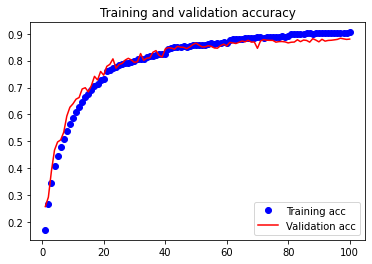

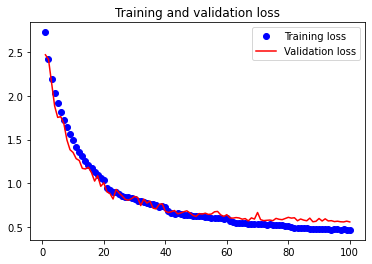

In [51]:
#输出准确率
scores = model.evaluate(x_test,y_test,verbose=1)
print('Test loss:',scores[0])
print('Test accuracy:',scores[1])

# 绘图
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("deepcnn_accuracy.png")
plt.figure() # 新建一个图
plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("deepcnn_loss.png")